In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

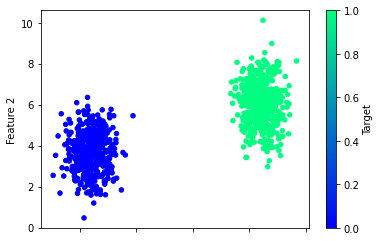

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 718us/step - loss: 0.7791 - accuracy: 0.2947
Epoch 2/100
24/24 [==============================] - 0s 529us/step - loss: 0.7654 - accuracy: 0.3133
Epoch 3/100
24/24 [==============================] - 0s 541us/step - loss: 0.7534 - accuracy: 0.3240
Epoch 4/100
24/24 [==============================] - 0s 542us/step - loss: 0.7432 - accuracy: 0.3467
Epoch 5/100
24/24 [==============================] - 0s 529us/step - loss: 0.7344 - accuracy: 0.3693
Epoch 6/100
24/24 [==============================] - 0s 555us/step - loss: 0.7268 - accuracy: 0.3773
Epoch 7/100
24/24 [==============================] - 0s 546us/step - loss: 0.7202 - accuracy: 0.3893
Epoch 8/100
24/24 [==============================] - 0s 559us/step - loss: 0.7147 - accuracy: 0.4040
Epoch 9/100
24/24 [==============================] - 0s 538us/step - loss: 0.7095 - accuracy: 0.4253
Epoch 10/100
24/24 [==============================] - 0s 544us/step - loss: 0.7051 - accura

24/24 [==============================] - 0s 584us/step - loss: 0.1290 - accuracy: 1.0000
Epoch 82/100
24/24 [==============================] - 0s 582us/step - loss: 0.1265 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 560us/step - loss: 0.1242 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 536us/step - loss: 0.1218 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 533us/step - loss: 0.1196 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 536us/step - loss: 0.1174 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 535us/step - loss: 0.1153 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 520us/step - loss: 0.1132 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 521us/step - loss: 0.1111 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 515us/step - loss: 0.1092 - accuracy: 

<AxesSubplot:>

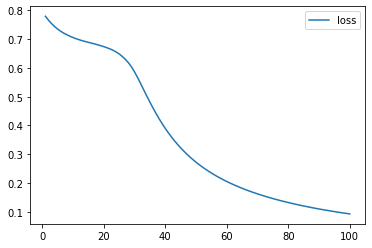

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

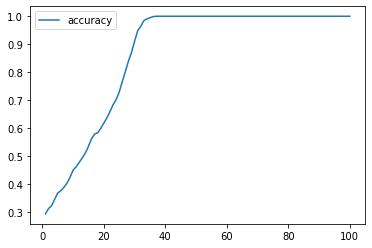

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


8/8 - 0s - loss: 0.0864 - accuracy: 1.0000
Loss: 0.08638782054185867, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

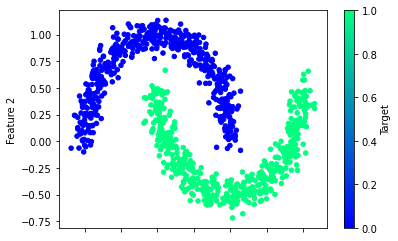

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Epoch 1/100
24/24 [==============================] - 0s 912us/step - loss: 0.7178 - accuracy: 0.6387
Epoch 2/100
24/24 [==============================] - 0s 848us/step - loss: 0.6489 - accuracy: 0.6627
Epoch 3/100
24/24 [==============================] - 0s 817us/step - loss: 0.5975 - accuracy: 0.6747
Epoch 4/100
24/24 [==============================] - 0s 777us/step - loss: 0.5607 - accuracy: 0.6960
Epoch 5/100
24/24 [==============================] - 0s 784us/step - loss: 0.5321 - accuracy: 0.7080
Epoch 6/100
24/24 [==============================] - 0s 760us/step - loss: 0.5099 - accuracy: 0.7187
Epoch 7/100
24/24 [==============================] - 0s 781us/step - loss: 0.4911 - accuracy: 0.7280
Epoch 8/100
24/24 [==============================] - 0s 842us/step - loss: 0.4754 - accuracy: 0.7347
Epoch 9/100
24/24 [==============================] - 0s 761us/step - loss: 0.4618 - accuracy: 0.7427
Epoch 10/100
24/24 [==============================] - 0s 809us/step - loss: 0.4504 - accura

24/24 [==============================] - 0s 791us/step - loss: 0.2649 - accuracy: 0.8907
Epoch 82/100
24/24 [==============================] - 0s 848us/step - loss: 0.2645 - accuracy: 0.8907
Epoch 83/100
24/24 [==============================] - 0s 796us/step - loss: 0.2642 - accuracy: 0.8907
Epoch 84/100
24/24 [==============================] - 0s 789us/step - loss: 0.2639 - accuracy: 0.8907
Epoch 85/100
24/24 [==============================] - 0s 774us/step - loss: 0.2636 - accuracy: 0.8907
Epoch 86/100
24/24 [==============================] - 0s 782us/step - loss: 0.2632 - accuracy: 0.8920
Epoch 87/100
24/24 [==============================] - 0s 804us/step - loss: 0.2630 - accuracy: 0.8920
Epoch 88/100
24/24 [==============================] - 0s 785us/step - loss: 0.2627 - accuracy: 0.8920
Epoch 89/100
24/24 [==============================] - 0s 793us/step - loss: 0.2624 - accuracy: 0.8920
Epoch 90/100
24/24 [==============================] - 0s 782us/step - loss: 0.2622 - accuracy: 

<AxesSubplot:>

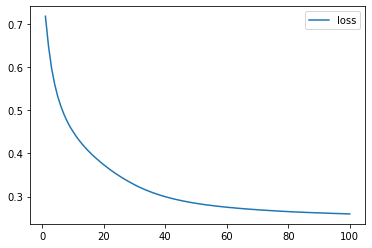

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

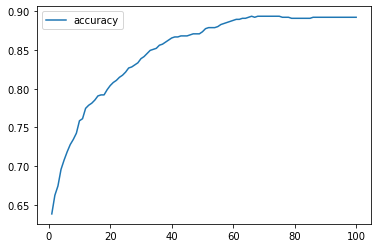

In [19]:
# Plot the loss
history_df.plot(y="accuracy")

In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Epoch 1/100
24/24 [==============================] - 0s 672us/step - loss: 0.7689 - accuracy: 0.4693
Epoch 2/100
24/24 [==============================] - 0s 537us/step - loss: 0.7287 - accuracy: 0.4693
Epoch 3/100
24/24 [==============================] - 0s 528us/step - loss: 0.6928 - accuracy: 0.4693
Epoch 4/100
24/24 [==============================] - 0s 546us/step - loss: 0.6615 - accuracy: 0.4680
Epoch 5/100
24/24 [==============================] - 0s 527us/step - loss: 0.6332 - accuracy: 0.4640
Epoch 6/100
24/24 [==============================] - 0s 579us/step - loss: 0.6076 - accuracy: 0.4947
Epoch 7/100
24/24 [==============================] - 0s 595us/step - loss: 0.5845 - accuracy: 0.5320
Epoch 8/100
24/24 [==============================] - 0s 574us/step - loss: 0.5630 - accuracy: 0.5773
Epoch 9/100
24/24 [==============================] - 0s 576us/step - loss: 0.5434 - accuracy: 0.6427
Epoch 10/100
24/24 [==============================] - 0s 546us/step - loss: 0.5255 - accura

24/24 [==============================] - 0s 546us/step - loss: 0.2235 - accuracy: 0.9080
Epoch 82/100
24/24 [==============================] - 0s 592us/step - loss: 0.2224 - accuracy: 0.9093
Epoch 83/100
24/24 [==============================] - 0s 536us/step - loss: 0.2211 - accuracy: 0.9080
Epoch 84/100
24/24 [==============================] - 0s 526us/step - loss: 0.2199 - accuracy: 0.9093
Epoch 85/100
24/24 [==============================] - 0s 550us/step - loss: 0.2187 - accuracy: 0.9107
Epoch 86/100
24/24 [==============================] - 0s 534us/step - loss: 0.2176 - accuracy: 0.9120
Epoch 87/100
24/24 [==============================] - 0s 538us/step - loss: 0.2166 - accuracy: 0.9107
Epoch 88/100
24/24 [==============================] - 0s 535us/step - loss: 0.2155 - accuracy: 0.9107
Epoch 89/100
24/24 [==============================] - 0s 577us/step - loss: 0.2144 - accuracy: 0.9107
Epoch 90/100
24/24 [==============================] - 0s 577us/step - loss: 0.2134 - accuracy: 

In [24]:
# Import our dependencies
import pandas as pd
import sklearn as skl

# Read in our ramen data
ramen_df = pd.read_csv("ramen-ratings.csv")

# Print out the Country value counts
country_counts = ramen_df.Country.value_counts()
country_counts

Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Myanmar           14
Nepal             14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Cambodia           5
Brazil             5
Holland            4
Poland             4
Fiji               4
Sweden             3
Sarawak            3
Dubai              3
Finland            3
Ghana              2
Estonia            2
Nigeria            1
United States      1
Name: Country, dtype: int64

<AxesSubplot:ylabel='Density'>

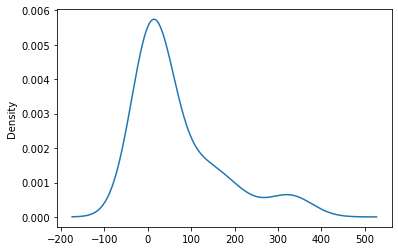

In [25]:
# Visualize the value counts
country_counts.plot.density()

In [26]:
# Determine which values to replace
replace_countries = list(country_counts[country_counts < 100].index)

# Replace in DataFrame
for country in replace_countries:
    ramen_df.Country = ramen_df.Country.replace(country,"Other")


# Check to make sure binning was successful
ramen_df.Country.value_counts()

Other          376
Japan          352
USA            323
South Korea    309
Taiwan         224
Thailand       191
China          169
Malaysia       156
Hong Kong      137
Indonesia      126
Singapore      109
Vietnam        108
Name: Country, dtype: int64

In [27]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(ramen_df.Country.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['Country'])
encode_df.head()

,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# Merge the two DataFrames together and drop the Country column
ramen_df.merge(encode_df,left_index=True,right_index=True).drop("Country",1)

,Review #,Brand,Variety,Style,Stars,Top Ten,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,2580,New Touch,T's Restaurant Tantanmen,Cup,3.75,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,2.25,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,2.75,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2576,Ching's Secret,Singapore Curry,Pack,3.75,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,3.5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [29]:
# Import our dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Read in our dataset
hr_df = pd.read_csv("hr_dataset.csv")
hr_df.head()


,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,0.30,1,253,2
1,0.25,1,200,0
2,0.90,4,2880,5
3,0.65,3,1450,3
4,0.50,2,785,2


In [30]:
# Create the StandardScaler instance
scaler = StandardScaler()


In [31]:
# Fit the StandardScaler
scaler.fit(hr_df)

StandardScaler()

In [32]:
# Scale the data
scaled_data = scaler.transform(hr_df)

In [33]:
# Create a DataFrame with the scaled data
transformed_scaled_data = pd.DataFrame(scaled_data, columns=hr_df.columns)
transformed_scaled_data.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,-1.303615,-1.162476,-1.049481,-0.558656
1,-1.512945,-1.162476,-1.094603,-1.804887
2,1.208335,0.860233,1.187080,1.310692
3,0.161689,0.185996,-0.030385,0.064460
4,-0.466299,-0.488240,-0.596549,-0.558656


In [34]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
attrition_df = pd.read_csv('HR-Employee-Attrition.csv')
attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [35]:
# Generate our categorical variable list
attrition_cat = attrition_df.dtypes[attrition_df.dtypes == "object"].index.tolist()

In [36]:
# Check the number of unique values in each column
attrition_df[attrition_cat].nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [37]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(attrition_df[attrition_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(attrition_cat)
encode_df.head()

,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [38]:
# Merge one-hot encoded features and drop the originals
attrition_df = attrition_df.merge(encode_df,left_index=True, right_index=True)
attrition_df = attrition_df.drop(attrition_cat,1)
attrition_df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,49,279,8,1,1,2,3,61,2,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,37,1373,2,2,1,4,4,92,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,33,1392,3,4,1,5,4,56,3,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,27,591,2,1,1,7,1,40,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [39]:
# Split our preprocessed data into our features and target arrays
y = attrition_df["Attrition_Yes"].values
X = attrition_df.drop(["Attrition_Yes","Attrition_No"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [40]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [41]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 448       
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6         
Total params: 499
Trainable params: 499
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [43]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
35/35 [==============================] - 0s 653us/step - loss: 5.7143 - accuracy: 0.7958
Epoch 2/100
35/35 [==============================] - 0s 599us/step - loss: 2.7054 - accuracy: 0.8276
Epoch 3/100
35/35 [==============================] - 0s 593us/step - loss: 2.1706 - accuracy: 0.8267
Epoch 4/100
35/35 [==============================] - 0s 573us/step - loss: 1.8884 - accuracy: 0.8267
Epoch 5/100
35/35 [==============================] - 0s 615us/step - loss: 1.6644 - accuracy: 0.8258
Epoch 6/100
35/35 [==============================] - 0s 585us/step - loss: 1.4053 - accuracy: 0.8267
Epoch 7/100
35/35 [==============================] - 0s 616us/step - loss: 1.1921 - accuracy: 0.8267
Epoch 8/100
35/35 [==============================] - 0s 621us/step - loss: 0.9838 - accuracy: 0.8267
Epoch 9/100
35/35 [==============================] - 0s 585us/step - loss: 0.8524 - accuracy: 0.8267
Epoch 10/100
35/35 [==============================] - 0s 601us/step - loss: 0.7192 - accura

35/35 [==============================] - 0s 628us/step - loss: 0.4600 - accuracy: 0.8276
Epoch 82/100
35/35 [==============================] - 0s 640us/step - loss: 0.4598 - accuracy: 0.8276
Epoch 83/100
35/35 [==============================] - 0s 589us/step - loss: 0.4598 - accuracy: 0.8276
Epoch 84/100
35/35 [==============================] - 0s 586us/step - loss: 0.4598 - accuracy: 0.8276
Epoch 85/100
35/35 [==============================] - 0s 597us/step - loss: 0.4597 - accuracy: 0.8276
Epoch 86/100
35/35 [==============================] - 0s 632us/step - loss: 0.4596 - accuracy: 0.8276
Epoch 87/100
35/35 [==============================] - 0s 630us/step - loss: 0.4596 - accuracy: 0.8276
Epoch 88/100
35/35 [==============================] - 0s 629us/step - loss: 0.4596 - accuracy: 0.8276
Epoch 89/100
35/35 [==============================] - 0s 611us/step - loss: 0.4595 - accuracy: 0.8276
Epoch 90/100
35/35 [==============================] - 0s 603us/step - loss: 0.4595 - accuracy: 

In [44]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


12/12 - 0s - loss: 0.3893 - accuracy: 0.8723
Loss: 0.38933002948760986, Accuracy: 0.8722826242446899


In [46]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf

# Import our input dataset
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
# Remove diabetes outcome target from features data
y = diabetes_df.Outcome
X = diabetes_df.drop(columns="Outcome")

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [50]:
# Preprocess numerical data for neural network

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [51]:
# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")


 Logistic regression model accuracy: 0.729


In [52]:
# Define the basic neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=8))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
18/18 [==============================] - 0s 765us/step - loss: 0.6505 - accuracy: 0.6510
Epoch 2/50
18/18 [==============================] - 0s 636us/step - loss: 0.6221 - accuracy: 0.6667
Epoch 3/50
18/18 [==============================] - 0s 574us/step - loss: 0.6000 - accuracy: 0.6823
Epoch 4/50
18/18 [==============================] - 0s 571us/step - loss: 0.5824 - accuracy: 0.6944
Epoch 5/50
18/18 [==============================] - 0s 599us/step - loss: 0.5675 - accuracy: 0.6944
Epoch 6/50
18/18 [==============================] - 0s 536us/step - loss: 0.5549 - accuracy: 0.7049
Epoch 7/50
18/18 [==============================] - 0s 537us/step - loss: 0.5448 - accuracy: 0.7118
Epoch 8/50
18/18 [==============================] - 0s 537us/step - loss: 0.5357 - accuracy: 0.7274
Epoch 9/50
18/18 [==============================] - 0s 537us/step - loss: 0.5278 - accuracy: 0.7240
Epoch 10/50
18/18 [==============================] - 0s 528us/step - loss: 0.5203 - accuracy: 0.7361

In [54]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import pandas as pd
import tensorflow as tf

# Import our input dataset
tele_df = pd.read_csv('bank_telemarketing.csv')
tele_df.head()

,Age,Job,Marital_Status,Education,Default_Credit,Housing_Loan,Personal_Loan,Subscribed
0,56,other,married,Primary_Education,no,no,no,no
1,37,services,married,Secondary_Education,no,yes,no,no
2,40,admin,married,Primary_Education,no,no,no,no
3,56,services,married,Secondary_Education,no,no,yes,no
4,59,admin,married,Professional_Education,no,no,no,no


In [55]:
# Generate our categorical variable list
tele_cat = tele_df.dtypes[tele_df.dtypes == "object"].index.tolist()


# Check the number of unique values in each column
tele_df[tele_cat].nunique()

Job               9
Marital_Status    3
Education         4
Default_Credit    2
Housing_Loan      2
Personal_Loan     2
Subscribed        2
dtype: int64

In [56]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(tele_df[tele_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(tele_cat)
encode_df.head()

,Job_admin,Job_blue-collar,Job_entrepreneur,Job_management,Job_other,Job_retired,Job_self-employed,Job_services,Job_technician,Marital_Status_divorced,...,Education_Secondary_Education,Education_Tertiary_Education,Default_Credit_no,Default_Credit_yes,Housing_Loan_no,Housing_Loan_yes,Personal_Loan_no,Personal_Loan_yes,Subscribed_no,Subscribed_yes
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [57]:
# Merge one-hot encoded features and drop the originals
tele_df = tele_df.merge(encode_df,left_index=True, right_index=True)
tele_df = tele_df.drop(tele_cat,1)
tele_df.head()


,Age,Job_admin,Job_blue-collar,Job_entrepreneur,Job_management,Job_other,Job_retired,Job_self-employed,Job_services,Job_technician,...,Education_Secondary_Education,Education_Tertiary_Education,Default_Credit_no,Default_Credit_yes,Housing_Loan_no,Housing_Loan_yes,Personal_Loan_no,Personal_Loan_yes,Subscribed_no,Subscribed_yes
0,56,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,59,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [58]:
# Remove loan status target from features data
y = tele_df.Subscribed_yes.values
X = tele_df.drop(columns=["Subscribed_no","Subscribed_yes"]).values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [59]:
# Create the SVM model
svm = SVC(kernel='linear')


In [60]:
# Train the model
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [61]:
# Evaluate the model
y_pred = svm.predict(X_test_scaled)
print(f" SVM model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 SVM model accuracy: 0.873


In [62]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  10
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [63]:
# Train the model 
fit_model = nn.fit(X_train_scaled, y_train, epochs=50) 
# Evaluate the model using the test data 
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
715/715 [==============================] - 1s 627us/step - loss: 0.3967 - accuracy: 0.8689
Epoch 2/50
715/715 [==============================] - 0s 620us/step - loss: 0.3729 - accuracy: 0.8731
Epoch 3/50
715/715 [==============================] - 0s 659us/step - loss: 0.3696 - accuracy: 0.8733
Epoch 4/50
715/715 [==============================] - 0s 662us/step - loss: 0.3681 - accuracy: 0.8733
Epoch 5/50
715/715 [==============================] - 0s 662us/step - loss: 0.3670 - accuracy: 0.8734
Epoch 6/50
715/715 [==============================] - 0s 652us/step - loss: 0.3664 - accuracy: 0.8729
Epoch 7/50
715/715 [==============================] - 0s 645us/step - loss: 0.3658 - accuracy: 0.8733
Epoch 8/50
715/715 [==============================] - 0s 659us/step - loss: 0.3653 - accuracy: 0.8737
Epoch 9/50
715/715 [==============================] - 0s 668us/step - loss: 0.3650 - accuracy: 0.8737
Epoch 10/50
715/715 [==============================] - 0s 618us/step - loss: 0.364

In [64]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
loans_df = pd.read_csv('loan_status.csv')
loans_df.head()


,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,Fully_Paid,99999999,Short_Term,741.0,2231892.0,8_years,Own_Home,Debt_Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
1,Fully_Paid,217646,Short_Term,730.0,1184194.0,<_1_year,Home_Mortgage,Debt_Consolidation,10855.08,19.6,10.0,13,1,122170,272052.0,1.0,0.0
2,Fully_Paid,548746,Short_Term,678.0,2559110.0,2_years,Rent,Debt_Consolidation,18660.28,22.6,33.0,4,0,437171,555038.0,0.0,0.0
3,Fully_Paid,99999999,Short_Term,728.0,714628.0,3_years,Rent,Debt_Consolidation,11851.06,16.0,76.0,16,0,203965,289784.0,0.0,0.0
4,Fully_Paid,99999999,Short_Term,740.0,776188.0,<_1_year,Own_Home,Debt_Consolidation,11578.22,8.5,25.0,6,0,134083,220220.0,0.0,0.0


In [65]:
# Generate our categorical variable list
loans_cat = loans_df.dtypes[loans_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
loans_df[loans_cat].nunique()

Loan_Status              2
Term                     2
Years_in_current_job    11
Home_Ownership           4
Purpose                  7
dtype: int64

In [66]:
# Check the unique value counts to see if binning is required
loans_df.Years_in_current_job.value_counts()


10+_years    13149
2_years       3225
3_years       2997
<_1_year      2699
5_years       2487
4_years       2286
1_year        2247
6_years       2109
7_years       2082
8_years       1675
9_years       1467
Name: Years_in_current_job, dtype: int64

In [67]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(loans_df[loans_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(loans_cat)
encode_df.head()

,Loan_Status_Fully_Paid,Loan_Status_Not_Paid,Term_Long_Term,Term_Short_Term,Years_in_current_job_10+_years,Years_in_current_job_1_year,Years_in_current_job_2_years,Years_in_current_job_3_years,Years_in_current_job_4_years,Years_in_current_job_5_years,...,Home_Ownership_Home_Mortgage,Home_Ownership_Own_Home,Home_Ownership_Rent,Purpose_Business_Loan,Purpose_Buy_House,Purpose_Buy_a_Car,Purpose_Debt_Consolidation,Purpose_Home_Improvements,Purpose_Medical_Bills,Purpose_Other
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [68]:
# Merge one-hot encoded features and drop the originals
loans_df = loans_df.merge(encode_df,left_index=True, right_index=True)
loans_df = loans_df.drop(loans_cat,1)
loans_df.head()

,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,...,Home_Ownership_Home_Mortgage,Home_Ownership_Own_Home,Home_Ownership_Rent,Purpose_Business_Loan,Purpose_Buy_House,Purpose_Buy_a_Car,Purpose_Debt_Consolidation,Purpose_Home_Improvements,Purpose_Medical_Bills,Purpose_Other
0,99999999,741.0,2231892.0,29200.53,14.9,29.0,18,1,297996,750090.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,217646,730.0,1184194.0,10855.08,19.6,10.0,13,1,122170,272052.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,548746,678.0,2559110.0,18660.28,22.6,33.0,4,0,437171,555038.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,99999999,728.0,714628.0,11851.06,16.0,76.0,16,0,203965,289784.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,99999999,740.0,776188.0,11578.22,8.5,25.0,6,0,134083,220220.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [69]:
# Remove loan status target from features data
y = loans_df.Loan_Status_Fully_Paid
X = loans_df.drop(columns=["Loan_Status_Fully_Paid","Loan_Status_Not_Paid"])

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [70]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")


 Random forest predictive accuracy: 0.849


In [71]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  24
hidden_nodes_layer2 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
854/854 [==============================] - 1s 639us/step - loss: 0.4356 - accuracy: 0.8324
Epoch 2/50
854/854 [==============================] - 1s 643us/step - loss: 0.3881 - accuracy: 0.8489
Epoch 3/50
854/854 [==============================] - 1s 647us/step - loss: 0.3837 - accuracy: 0.8493
Epoch 4/50
854/854 [==============================] - 1s 634us/step - loss: 0.3816 - accuracy: 0.8491
Epoch 5/50
854/854 [==============================] - 1s 640us/step - loss: 0.3799 - accuracy: 0.8493
Epoch 6/50
854/854 [==============================] - 1s 642us/step - loss: 0.3789 - accuracy: 0.8495
Epoch 7/50
854/854 [==============================] - 1s 650us/step - loss: 0.3780 - accuracy: 0.8497
Epoch 8/50
854/854 [==============================] - 1s 622us/step - loss: 0.3770 - accuracy: 0.8496
Epoch 9/50
854/854 [==============================] - 1s 636us/step - loss: 0.3761 - accuracy: 0.8496
Epoch 10/50
854/854 [==============================] - 1s 617us/step - loss: 0.375

In [72]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [73]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=100)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
 74/854 [=>............................] - ETA: 0s - loss: 0.3502 - accuracy: 0.8606  
Epoch 00001: saving model to checkpoints/weights.01.hdf5
139/854 [===>..........................] - ETA: 0s - loss: 0.3518 - accuracy: 0.8575
Epoch 00001: saving model to checkpoints/weights.01.hdf5
282/854 [========>.....................] - ETA: 0s - loss: 0.3655 - accuracy: 0.8516
Epoch 00001: saving model to checkpoints/weights.01.hdf5
353/854 [===========>..................] - ETA: 0s - loss: 0.3628 - accuracy: 0.8527
Epoch 00001: saving model to checkpoints/weights.01.hdf5
495/854 [================>.............] - ETA: 0s - loss: 0.3654 - accuracy: 0.8494
Epoch 00001: saving model to checkpoints/weights.01.hdf5
566/854 [==================>...........] - ETA: 0s - loss: 0.3648 - accuracy: 0.8507
Epoch 00001: saving model to checkpoints/weights.01.hdf5
634/854 [=====================>........] - ETA: 0s - loss: 0.3629 - accuracy: 0.8514
Epoch 00001: saving model to checkpoints/weights.

220/854 [======>.......................] - ETA: 0s - loss: 0.3602 - accuracy: 0.8528
Epoch 00007: saving model to checkpoints/weights.07.hdf5
362/854 [===========>..................] - ETA: 0s - loss: 0.3626 - accuracy: 0.8516
Epoch 00007: saving model to checkpoints/weights.07.hdf5
432/854 [==============>...............] - ETA: 0s - loss: 0.3647 - accuracy: 0.8505
Epoch 00007: saving model to checkpoints/weights.07.hdf5
575/854 [===================>..........] - ETA: 0s - loss: 0.3633 - accuracy: 0.8506
Epoch 00007: saving model to checkpoints/weights.07.hdf5
642/854 [=====================>........] - ETA: 0s - loss: 0.3620 - accuracy: 0.8515
Epoch 00007: saving model to checkpoints/weights.07.hdf5
707/854 [=======================>......] - ETA: 0s - loss: 0.3614 - accuracy: 0.8521
Epoch 00007: saving model to checkpoints/weights.07.hdf5
854/854 [==============================] - 1s 715us/step - loss: 0.3598 - accuracy: 0.8533
Epoch 8/100
  1/854 [..............................] - ET

427/854 [==============>...............] - ETA: 0s - loss: 0.3561 - accuracy: 0.8560
Epoch 00013: saving model to checkpoints/weights.13.hdf5
493/854 [================>.............] - ETA: 0s - loss: 0.3548 - accuracy: 0.8566
Epoch 00013: saving model to checkpoints/weights.13.hdf5
636/854 [=====================>........] - ETA: 0s - loss: 0.3577 - accuracy: 0.8542
Epoch 00013: saving model to checkpoints/weights.13.hdf5
705/854 [=======================>......] - ETA: 0s - loss: 0.3596 - accuracy: 0.8531
Epoch 00013: saving model to checkpoints/weights.13.hdf5
849/854 [============================>.] - ETA: 0s - loss: 0.3582 - accuracy: 0.8538
Epoch 00013: saving model to checkpoints/weights.13.hdf5
854/854 [==============================] - 1s 720us/step - loss: 0.3586 - accuracy: 0.8536
Epoch 14/100
 74/854 [=>............................] - ETA: 0s - loss: 0.3521 - accuracy: 0.8577
Epoch 00014: saving model to checkpoints/weights.14.hdf5
142/854 [===>..........................] - E

560/854 [==================>...........] - ETA: 0s - loss: 0.3564 - accuracy: 0.8547
Epoch 00019: saving model to checkpoints/weights.19.hdf5
704/854 [=======================>......] - ETA: 0s - loss: 0.3574 - accuracy: 0.8546
Epoch 00019: saving model to checkpoints/weights.19.hdf5
773/854 [==========================>...] - ETA: 0s - loss: 0.3578 - accuracy: 0.8540
Epoch 00019: saving model to checkpoints/weights.19.hdf5
854/854 [==============================] - 1s 718us/step - loss: 0.3572 - accuracy: 0.8542
Epoch 20/100
 73/854 [=>............................] - ETA: 0s - loss: 0.3665 - accuracy: 0.8523
Epoch 00020: saving model to checkpoints/weights.20.hdf5
147/854 [====>.........................] - ETA: 0s - loss: 0.3637 - accuracy: 0.8523
Epoch 00020: saving model to checkpoints/weights.20.hdf5
217/854 [======>.......................] - ETA: 0s - loss: 0.3576 - accuracy: 0.8544
Epoch 00020: saving model to checkpoints/weights.20.hdf5
360/854 [===========>..................] - E

783/854 [==========================>...] - ETA: 0s - loss: 0.3565 - accuracy: 0.8548
Epoch 00025: saving model to checkpoints/weights.25.hdf5
854/854 [==============================] - 1s 715us/step - loss: 0.3573 - accuracy: 0.8544
Epoch 26/100
  1/854 [..............................] - ETA: 0s - loss: 0.3702 - accuracy: 0.8438
Epoch 00026: saving model to checkpoints/weights.26.hdf5
142/854 [===>..........................] - ETA: 0s - loss: 0.3618 - accuracy: 0.8497
Epoch 00026: saving model to checkpoints/weights.26.hdf5
208/854 [======>.......................] - ETA: 0s - loss: 0.3615 - accuracy: 0.8516
Epoch 00026: saving model to checkpoints/weights.26.hdf5
274/854 [========>.....................] - ETA: 0s - loss: 0.3639 - accuracy: 0.8495
Epoch 00026: saving model to checkpoints/weights.26.hdf5
424/854 [=============>................] - ETA: 0s - loss: 0.3567 - accuracy: 0.8526
Epoch 00026: saving model to checkpoints/weights.26.hdf5
493/854 [================>.............] - E

  1/854 [..............................] - ETA: 0s - loss: 0.3753 - accuracy: 0.9062
Epoch 00032: saving model to checkpoints/weights.32.hdf5
 71/854 [=>............................] - ETA: 0s - loss: 0.3382 - accuracy: 0.8600
Epoch 00032: saving model to checkpoints/weights.32.hdf5
212/854 [======>.......................] - ETA: 0s - loss: 0.3479 - accuracy: 0.8569
Epoch 00032: saving model to checkpoints/weights.32.hdf5
277/854 [========>.....................] - ETA: 0s - loss: 0.3504 - accuracy: 0.8568
Epoch 00032: saving model to checkpoints/weights.32.hdf5
415/854 [=============>................] - ETA: 0s - loss: 0.3511 - accuracy: 0.8568
Epoch 00032: saving model to checkpoints/weights.32.hdf5
481/854 [===============>..............] - ETA: 0s - loss: 0.3528 - accuracy: 0.8558
Epoch 00032: saving model to checkpoints/weights.32.hdf5
619/854 [====================>.........] - ETA: 0s - loss: 0.3565 - accuracy: 0.8541
Epoch 00032: saving model to checkpoints/weights.32.hdf5
686/85

138/854 [===>..........................] - ETA: 0s - loss: 0.3514 - accuracy: 0.8567
Epoch 00038: saving model to checkpoints/weights.38.hdf5
284/854 [========>.....................] - ETA: 0s - loss: 0.3472 - accuracy: 0.8604
Epoch 00038: saving model to checkpoints/weights.38.hdf5
357/854 [===========>..................] - ETA: 0s - loss: 0.3510 - accuracy: 0.8571
Epoch 00038: saving model to checkpoints/weights.38.hdf5
500/854 [================>.............] - ETA: 0s - loss: 0.3551 - accuracy: 0.8549
Epoch 00038: saving model to checkpoints/weights.38.hdf5
571/854 [===================>..........] - ETA: 0s - loss: 0.3547 - accuracy: 0.8552
Epoch 00038: saving model to checkpoints/weights.38.hdf5
640/854 [=====================>........] - ETA: 0s - loss: 0.3544 - accuracy: 0.8555
Epoch 00038: saving model to checkpoints/weights.38.hdf5
792/854 [==========================>...] - ETA: 0s - loss: 0.3552 - accuracy: 0.8548
Epoch 00038: saving model to checkpoints/weights.38.hdf5
854/85

355/854 [===========>..................] - ETA: 0s - loss: 0.3432 - accuracy: 0.8603
Epoch 00044: saving model to checkpoints/weights.44.hdf5
423/854 [=============>................] - ETA: 0s - loss: 0.3446 - accuracy: 0.8594
Epoch 00044: saving model to checkpoints/weights.44.hdf5
563/854 [==================>...........] - ETA: 0s - loss: 0.3507 - accuracy: 0.8563
Epoch 00044: saving model to checkpoints/weights.44.hdf5
629/854 [=====================>........] - ETA: 0s - loss: 0.3521 - accuracy: 0.8561
Epoch 00044: saving model to checkpoints/weights.44.hdf5
777/854 [==========================>...] - ETA: 0s - loss: 0.3542 - accuracy: 0.8545
Epoch 00044: saving model to checkpoints/weights.44.hdf5
854/854 [==============================] - 1s 718us/step - loss: 0.3544 - accuracy: 0.8545
Epoch 45/100
  1/854 [..............................] - ETA: 0s - loss: 0.3692 - accuracy: 0.8125
Epoch 00045: saving model to checkpoints/weights.45.hdf5
 71/854 [=>............................] - E

501/854 [================>.............] - ETA: 0s - loss: 0.3572 - accuracy: 0.8539
Epoch 00050: saving model to checkpoints/weights.50.hdf5
648/854 [=====================>........] - ETA: 0s - loss: 0.3541 - accuracy: 0.8548
Epoch 00050: saving model to checkpoints/weights.50.hdf5
716/854 [========================>.....] - ETA: 0s - loss: 0.3545 - accuracy: 0.8544
Epoch 00050: saving model to checkpoints/weights.50.hdf5
784/854 [==========================>...] - ETA: 0s - loss: 0.3538 - accuracy: 0.8548
Epoch 00050: saving model to checkpoints/weights.50.hdf5
854/854 [==============================] - 1s 713us/step - loss: 0.3535 - accuracy: 0.8554
Epoch 51/100
 76/854 [=>............................] - ETA: 0s - loss: 0.3613 - accuracy: 0.8528
Epoch 00051: saving model to checkpoints/weights.51.hdf5
144/854 [====>.........................] - ETA: 0s - loss: 0.3595 - accuracy: 0.8526
Epoch 00051: saving model to checkpoints/weights.51.hdf5
290/854 [=========>....................] - E

690/854 [=======================>......] - ETA: 0s - loss: 0.3535 - accuracy: 0.8562
Epoch 00056: saving model to checkpoints/weights.56.hdf5
830/854 [============================>.] - ETA: 0s - loss: 0.3523 - accuracy: 0.8566
Epoch 00056: saving model to checkpoints/weights.56.hdf5
854/854 [==============================] - 1s 735us/step - loss: 0.3531 - accuracy: 0.8562
Epoch 57/100
  1/854 [..............................] - ETA: 0s - loss: 0.2247 - accuracy: 0.9062
Epoch 00057: saving model to checkpoints/weights.57.hdf5
153/854 [====>.........................] - ETA: 0s - loss: 0.3644 - accuracy: 0.8472
Epoch 00057: saving model to checkpoints/weights.57.hdf5
219/854 [======>.......................] - ETA: 0s - loss: 0.3577 - accuracy: 0.8516
Epoch 00057: saving model to checkpoints/weights.57.hdf5
364/854 [===========>..................] - ETA: 0s - loss: 0.3521 - accuracy: 0.8538
Epoch 00057: saving model to checkpoints/weights.57.hdf5
437/854 [==============>...............] - E

854/854 [==============================] - 1s 711us/step - loss: 0.3527 - accuracy: 0.8562
Epoch 63/100
  1/854 [..............................] - ETA: 0s - loss: 0.4262 - accuracy: 0.7812
Epoch 00063: saving model to checkpoints/weights.63.hdf5
144/854 [====>.........................] - ETA: 0s - loss: 0.3514 - accuracy: 0.8587
Epoch 00063: saving model to checkpoints/weights.63.hdf5
212/854 [======>.......................] - ETA: 0s - loss: 0.3569 - accuracy: 0.8547
Epoch 00063: saving model to checkpoints/weights.63.hdf5
352/854 [===========>..................] - ETA: 0s - loss: 0.3532 - accuracy: 0.8561
Epoch 00063: saving model to checkpoints/weights.63.hdf5
417/854 [=============>................] - ETA: 0s - loss: 0.3546 - accuracy: 0.8545
Epoch 00063: saving model to checkpoints/weights.63.hdf5
482/854 [===============>..............] - ETA: 0s - loss: 0.3560 - accuracy: 0.8538
Epoch 00063: saving model to checkpoints/weights.63.hdf5
630/854 [=====================>........] - E

 71/854 [=>............................] - ETA: 0s - loss: 0.3421 - accuracy: 0.8618
Epoch 00069: saving model to checkpoints/weights.69.hdf5
217/854 [======>.......................] - ETA: 0s - loss: 0.3491 - accuracy: 0.8574
Epoch 00069: saving model to checkpoints/weights.69.hdf5
287/854 [=========>....................] - ETA: 0s - loss: 0.3467 - accuracy: 0.8583
Epoch 00069: saving model to checkpoints/weights.69.hdf5
356/854 [===========>..................] - ETA: 0s - loss: 0.3468 - accuracy: 0.8580
Epoch 00069: saving model to checkpoints/weights.69.hdf5
503/854 [================>.............] - ETA: 0s - loss: 0.3477 - accuracy: 0.8572
Epoch 00069: saving model to checkpoints/weights.69.hdf5
572/854 [===================>..........] - ETA: 0s - loss: 0.3495 - accuracy: 0.8566
Epoch 00069: saving model to checkpoints/weights.69.hdf5
713/854 [========================>.....] - ETA: 0s - loss: 0.3499 - accuracy: 0.8569
Epoch 00069: saving model to checkpoints/weights.69.hdf5
783/85

280/854 [========>.....................] - ETA: 0s - loss: 0.3551 - accuracy: 0.8512
Epoch 00075: saving model to checkpoints/weights.75.hdf5
348/854 [===========>..................] - ETA: 0s - loss: 0.3533 - accuracy: 0.8528
Epoch 00075: saving model to checkpoints/weights.75.hdf5
490/854 [================>.............] - ETA: 0s - loss: 0.3575 - accuracy: 0.8512
Epoch 00075: saving model to checkpoints/weights.75.hdf5
559/854 [==================>...........] - ETA: 0s - loss: 0.3563 - accuracy: 0.8526
Epoch 00075: saving model to checkpoints/weights.75.hdf5
702/854 [=======================>......] - ETA: 0s - loss: 0.3522 - accuracy: 0.8556
Epoch 00075: saving model to checkpoints/weights.75.hdf5
772/854 [==========================>...] - ETA: 0s - loss: 0.3517 - accuracy: 0.8557
Epoch 00075: saving model to checkpoints/weights.75.hdf5
854/854 [==============================] - 1s 719us/step - loss: 0.3514 - accuracy: 0.8559
Epoch 76/100
  1/854 [..............................] - E

426/854 [=============>................] - ETA: 0s - loss: 0.3476 - accuracy: 0.8566
Epoch 00081: saving model to checkpoints/weights.81.hdf5
575/854 [===================>..........] - ETA: 0s - loss: 0.3488 - accuracy: 0.8568
Epoch 00081: saving model to checkpoints/weights.81.hdf5
649/854 [=====================>........] - ETA: 0s - loss: 0.3506 - accuracy: 0.8566
Epoch 00081: saving model to checkpoints/weights.81.hdf5
719/854 [========================>.....] - ETA: 0s - loss: 0.3524 - accuracy: 0.8561
Epoch 00081: saving model to checkpoints/weights.81.hdf5
854/854 [==============================] - 1s 701us/step - loss: 0.3514 - accuracy: 0.8563
Epoch 82/100
  1/854 [..............................] - ETA: 0s - loss: 0.3965 - accuracy: 0.8125
Epoch 00082: saving model to checkpoints/weights.82.hdf5
 70/854 [=>............................] - ETA: 0s - loss: 0.3445 - accuracy: 0.8612
Epoch 00082: saving model to checkpoints/weights.82.hdf5
218/854 [======>.......................] - E

647/854 [=====================>........] - ETA: 0s - loss: 0.3521 - accuracy: 0.8572
Epoch 00087: saving model to checkpoints/weights.87.hdf5
715/854 [========================>.....] - ETA: 0s - loss: 0.3522 - accuracy: 0.8572
Epoch 00087: saving model to checkpoints/weights.87.hdf5
854/854 [==============================] - 1s 708us/step - loss: 0.3515 - accuracy: 0.8570
Epoch 88/100
  1/854 [..............................] - ETA: 0s - loss: 0.3108 - accuracy: 0.9062
Epoch 00088: saving model to checkpoints/weights.88.hdf5
 67/854 [=>............................] - ETA: 0s - loss: 0.3439 - accuracy: 0.8587
Epoch 00088: saving model to checkpoints/weights.88.hdf5
134/854 [===>..........................] - ETA: 0s - loss: 0.3477 - accuracy: 0.8587
Epoch 00088: saving model to checkpoints/weights.88.hdf5
276/854 [========>.....................] - ETA: 0s - loss: 0.3482 - accuracy: 0.8587
Epoch 00088: saving model to checkpoints/weights.88.hdf5
345/854 [===========>..................] - E

776/854 [==========================>...] - ETA: 0s - loss: 0.3494 - accuracy: 0.8575
Epoch 00093: saving model to checkpoints/weights.93.hdf5
854/854 [==============================] - 1s 722us/step - loss: 0.3505 - accuracy: 0.8569
Epoch 94/100
  1/854 [..............................] - ETA: 0s - loss: 0.3861 - accuracy: 0.8438
Epoch 00094: saving model to checkpoints/weights.94.hdf5
153/854 [====>.........................] - ETA: 0s - loss: 0.3447 - accuracy: 0.8568
Epoch 00094: saving model to checkpoints/weights.94.hdf5
222/854 [======>.......................] - ETA: 0s - loss: 0.3437 - accuracy: 0.8601
Epoch 00094: saving model to checkpoints/weights.94.hdf5
365/854 [===========>..................] - ETA: 0s - loss: 0.3444 - accuracy: 0.8612
Epoch 00094: saving model to checkpoints/weights.94.hdf5
432/854 [==============>...............] - ETA: 0s - loss: 0.3463 - accuracy: 0.8596
Epoch 00094: saving model to checkpoints/weights.94.hdf5
575/854 [===================>..........] - E

  1/854 [..............................] - ETA: 0s - loss: 0.2413 - accuracy: 0.9375
Epoch 00100: saving model to checkpoints/weights.100.hdf5
150/854 [====>.........................] - ETA: 0s - loss: 0.3368 - accuracy: 0.8662
Epoch 00100: saving model to checkpoints/weights.100.hdf5
220/854 [======>.......................] - ETA: 0s - loss: 0.3394 - accuracy: 0.8641
Epoch 00100: saving model to checkpoints/weights.100.hdf5
289/854 [=========>....................] - ETA: 0s - loss: 0.3428 - accuracy: 0.8620
Epoch 00100: saving model to checkpoints/weights.100.hdf5
433/854 [==============>...............] - ETA: 0s - loss: 0.3479 - accuracy: 0.8582
Epoch 00100: saving model to checkpoints/weights.100.hdf5
502/854 [================>.............] - ETA: 0s - loss: 0.3490 - accuracy: 0.8576
Epoch 00100: saving model to checkpoints/weights.100.hdf5
647/854 [=====================>........] - ETA: 0s - loss: 0.3524 - accuracy: 0.8559
Epoch 00100: saving model to checkpoints/weights.100.hdf5

In [75]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  24
hidden_nodes_layer2 = 12

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.100.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

285/285 - 0s - loss: 0.4074 - accuracy: 0.8431
Loss: 0.40743955969810486, Accuracy: 0.8430705070495605
